In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import seaborn as sns
import matplotlib.colors as mcolors
import datetime
import matplotlib.dates as mdates

In [2]:
data_path = "./data/"
interpolated_sonde = "anxinterpolatedsondeM1.c1.20200313.000030.custom.nc"
fluxes = "anx30ecorM1.b1.20200313.000000.nc"
flux_csv = 'anx30ecorM1.b1.20200314.000000.custom.csv'

In [3]:
data = xr.open_dataset(data_path+interpolated_sonde, engine='netcdf4')
data

<xarray.Dataset>
Dimensions:            (time: 1440, height: 332)
Coordinates:
  * time               (time) datetime64[ns] 2020-03-13T00:00:30 ... 2020-03-...
  * height             (height) float32 0.002 0.022 0.042 ... 39.5 40.0 40.5
Data variables: (12/39)
    base_time          datetime64[ns] ...
    time_offset        (time) datetime64[ns] ...
    precip             (time) float32 ...
    qc_precip          (time) int32 ...
    temp               (time, height) float32 ...
    qc_temp            (time, height) int32 ...
    ...                 ...
    qc_rh_scaled       (time, height) int32 ...
    aqc_rh_scaled      (time, height) int32 ...
    vapor_source       (time, height) int32 ...
    lat                float32 ...
    lon                float32 ...
    alt                float32 ...
Attributes: (12/13)
    command_line:          idl -D 0 -R -n interpolatedsonde -s anx -f M1 -b 2...
    Conventions:           ARM-1.1
    process_version:       vap-interpolatedsonde-6.6-0.el6
    input_datastreams:     anxgriddedsondeM1.c0 : 3.0 : 20200311.000030-20200...
    dod_version:           interpolatedsonde-c1-4.0
    site_id:               anx
    ...                    ...
    facility_id:           M1
    data_level:            c1
    location_description:  Cold-Air Outbreaks in the Marine Boundary Layer Ex...
    datastream:            anxinterpolatedsondeM1.c1
    doi:                   10.5439/1095316
    history:               created by user dsmgr on machine ruby at 2020-04-0...

In [4]:
data_flux = xr.open_dataset(data_path+fluxes, engine='netcdf4')
data_flux

<xarray.Dataset>
Dimensions:           (time: 48)
Coordinates:
  * time              (time) datetime64[ns] 2020-03-13 ... 2020-03-13T23:30:00
Data variables: (12/145)
    base_time         datetime64[ns] ...
    time_offset       (time) datetime64[ns] ...
    mean_u            (time) float32 ...
    qc_mean_u         (time) int32 ...
    mean_v            (time) float32 ...
    qc_mean_v         (time) int32 ...
    ...                ...
    n_bad_irga        (time) float32 ...
    n_bad_irga_light  (time) float32 ...
    mean_cooler       (time) float32 ...
    lat               float32 ...
    lon               float32 ...
    alt               float32 ...
Attributes: (12/40)
    command_line:              ecor_ingest -s anx -f M1
    process_version:           ingest-ecor-13.4-3.el7
    dod_version:               30ecor-b1-2.2
    input_source:              /data/collection/anx/anxecorM1.00/2020_0313_00...
    site_id:                   anx
    platform_id:               30ecor
    ...                        ...
    qc_bit_3_description:      Value is greater than the valid_max.
    qc_bit_3_assessment:       Bad
    qc_bit_4_description:      Difference between current and previous values...
    qc_bit_4_assessment:       Indeterminate
    ingest_software:           ingest-ecor-13.4-3.el7
    history:                   created by user dsmgr on machine flint at 2020...

In [5]:
data_flux_csv = pd.read_csv(data_path+flux_csv, parse_dates=['time_offset'])
data_flux_csv.head()

,time,base_time,time_offset,mean_u,qc_mean_u,mean_v,qc_mean_v,mean_w,qc_mean_w,mean_t,...,mean_spk_t,mean_spk_q,mean_spk_c,n_bad_sonic,n_bad_irga,n_bad_irga_light,mean_cooler,lat,lon,alt
0,2020-03-14 00:00:00,2020-03-14,2020-03-14 00:00:00,-7.753,0,0.6906,0,1.169,0,278.3,...,277.2,205.7,16.32,12.0,0.0,0.0,1.119,69.14128,15.684167,2.0
1,2020-03-14 00:30:00,2020-03-14,2020-03-14 00:30:00,-10.710,0,0.4991,0,1.461,0,278.6,...,277.3,NaN,NaN,0.0,0.0,0.0,1.139,69.14128,15.684167,2.0
2,2020-03-14 01:00:00,2020-03-14,2020-03-14 01:00:00,-10.700,0,0.3158,0,1.427,0,278.4,...,280.3,253.7,17.10,10.0,0.0,0.0,1.143,69.14128,15.684167,2.0
3,2020-03-14 01:30:00,2020-03-14,2020-03-14 01:30:00,-10.470,0,-0.5686,0,1.338,0,279.0,...,277.6,NaN,NaN,0.0,0.0,0.0,1.142,69.14128,15.684167,2.0
4,2020-03-14 02:00:00,2020-03-14,2020-03-14 02:00:00,-8.396,0,-1.0430,0,1.009,0,279.3,...,278.6,NaN,17.58,0.0,0.0,0.0,1.150,69.14128,15.684167,2.0


In [6]:
# Extract variables from the dataset
time = np.array(data['time'])
height = data['height']
temperature = data['temp'] + 273.15 # convert from deg celcius to kelvin
specific_humidity = data['sh']  * 1000  # Convert from g/g to g/kg
potential_temperature = data['potential_temp']
relative_humidity = data['rh']
sensible_heat_flux = data_flux_csv['h'] #sensible heat flux
latent_heat_flux = data_flux_csv['lv_e'] # latent heat flux
time_for_lat_sens_heat = data_flux_csv['time_offset']

# Vertical Profile of Temperature, Specific Humidity and Relative Humidity Over Time

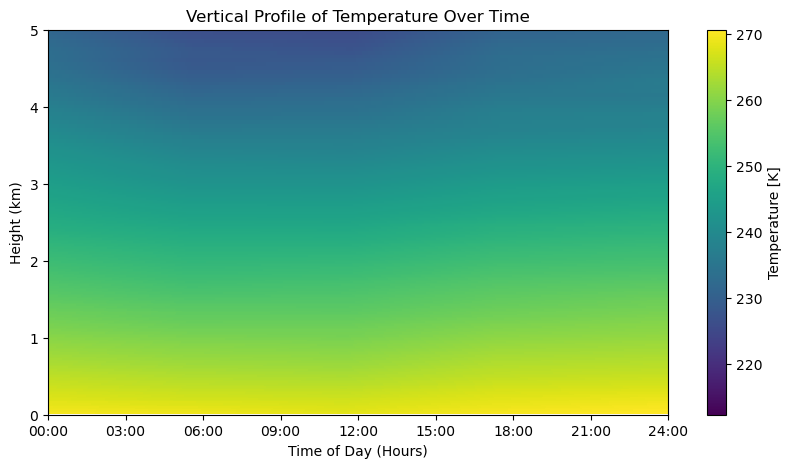

In [7]:
temperature_kelvin = temperature 
# Convert time to pandas datetime
time_pd = pd.to_datetime(time)

# Convert time to fractional hours
fractional_hours = [t.hour + t.minute / 60 + t.second / 3600 for t in time_pd.time]

# Extract numpy arrays for plotting
height_np = height.values
temperature_kelvin_np = temperature_kelvin.values.T  # Transposed for correct orientation

# Creating the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Using pcolormesh to create the plot
pcm = ax.pcolormesh(fractional_hours, height_np, temperature_kelvin_np, shading='auto')

# Adding a colorbar
cbar = plt.colorbar(pcm, ax=ax, label='Temperature [K]')

# Setting the y-axis limit
ax.set_ylim(0, 5)

# Formatting the x-axis to show every 3 hours
ax.set_xticks(np.arange(0, 25, 3))  # Every 3 hours
ax.set_xticklabels([f"{h:02d}:00" for h in range(0, 25, 3)])  # Hour labels

# Adding labels and a title
ax.set_xlabel("Time of Day (Hours)")
ax.set_ylabel("Height (km)")
ax.set_title("Vertical Profile of Temperature Over Time")
fig.savefig("./figures/temperature.png", dpi=500, bbox_inches="tight")

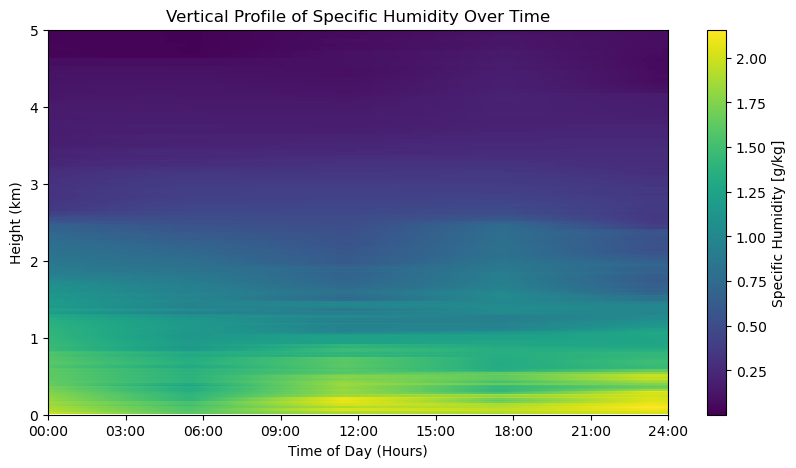

In [8]:
# Extracting specific humidity, time, and height
specific_humidity = specific_humidity

# Convert time to pandas datetime
time_pd = pd.to_datetime(time)

# Convert time to fractional hours
fractional_hours = [t.hour + t.minute / 60 + t.second / 3600 for t in time_pd.time]

# Extract numpy arrays for plotting
height_np = height.values
specific_humidity_np = specific_humidity.values.T  # Transposed for correct orientation

# Creating the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Using pcolormesh to create the pseudocolor plot
pcm = ax.pcolormesh(fractional_hours, height_np, specific_humidity_np, shading='auto')

# Adding a colorbar
cbar = plt.colorbar(pcm, ax=ax, label='Specific Humidity [g/kg]')

# Setting the y-axis limit
ax.set_ylim(0, 5)

# Formatting the x-axis to show every 3 hours
ax.set_xticks(np.arange(0, 25, 3))  # Every 3 hours
ax.set_xticklabels([f"{h:02d}:00" for h in range(0, 25, 3)])  # Hour labels

# Adding labels and a title
ax.set_xlabel("Time of Day (Hours)")
ax.set_ylabel("Height (km)")
ax.set_title("Vertical Profile of Specific Humidity Over Time")
fig.savefig("./figures/specific-humidity.png", dpi=500, bbox_inches="tight")

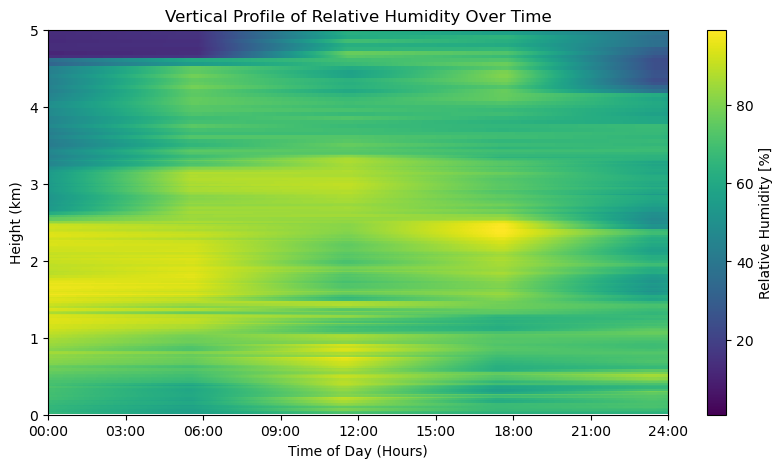

In [9]:
# Convert time to pandas datetime
time_pd = pd.to_datetime(time)

# Convert time to fractional hours
fractional_hours = [t.hour + t.minute / 60 + t.second / 3600 for t in time_pd.time]

# Extract numpy arrays for plotting
height_np = height.values
relative_humidity_np = relative_humidity.values.T  # Transposed for correct orientation

# Creating the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Using pcolormesh to create the pseudocolor plot
pcm = ax.pcolormesh(fractional_hours, height_np, relative_humidity_np, shading='auto')

# Adding a colorbar
cbar = plt.colorbar(pcm, ax=ax, label='Relative Humidity [%]')

# Setting the y-axis limit
ax.set_ylim(0, 5)

# Formatting the x-axis to show every 3 hours
ax.set_xticks(np.arange(0, 25, 3))  # Every 3 hours
ax.set_xticklabels([f"{h:02d}:00" for h in range(0, 25, 3)])  # Hour labels

# Adding labels and a title
ax.set_xlabel("Time of Day (Hours)")
ax.set_ylabel("Height (km)")
ax.set_title("Vertical Profile of Relative Humidity Over Time")
fig.savefig("./figures/relative-humidity.png", dpi=500, bbox_inches="tight")

# Mean Temperature, Relative humidity and Specific Humidity Profile over time

In [10]:
# Lists to store the mean values for each variable
mean_temperatures = []
mean_specific_humidity = []
mean_relative_humidity = []


# Looping through each unique time and calculating the mean for each variable
for time_point in time:
    mean_temp = temperature.sel(time=time_point).mean().item()
    mean_sh = specific_humidity.sel(time=time_point).mean().item()
    # mean_pt = potential_temperature.sel(time=time_point).mean().item()
    mean_rh = relative_humidity.sel(time=time_point).mean().item()
   
    mean_temperatures.append(mean_temp)
    mean_specific_humidity.append(mean_sh)
    mean_relative_humidity.append(mean_rh)

# # # Example: Displaying the first few mean values for each variable
print("First few mean temperatures:", mean_temperatures[:5])
print("First few mean specific humidity values:", mean_specific_humidity[:5])
print("First few mean relative humidity values:", mean_relative_humidity[:5])

First few mean temperatures: [241.7659912109375, 241.7620849609375, 241.7581787109375, 241.75425720214844, 241.7503662109375]
First few mean specific humidity values: [0.5848966240882874, 0.5846609473228455, 0.584425151348114, 0.5841894149780273, 0.5839536190032959]
First few mean relative humidity values: [49.54152297973633, 49.55203628540039, 49.56254959106445, 49.573062896728516, 49.58357620239258]


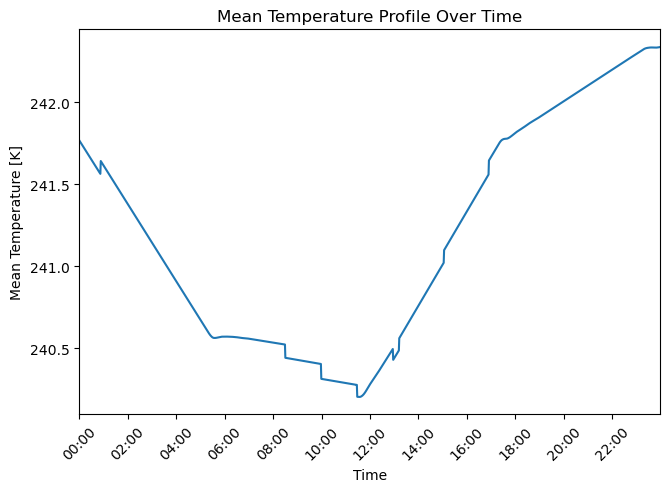

In [11]:
# Creating the plot using fig, ax
fig, ax = plt.subplots(figsize=(7.5, 5))

# Plotting the data
ax.plot(time, mean_temperatures)

# Formatting the plot
ax.set_xlabel('Time')
ax.set_ylabel('Mean Temperature [K]')
ax.set_title('Mean Temperature Profile Over Time')

# Set x-ticks at regular intervals (e.g., every 3 hours)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Set x-axis limits from 00:00 to 23:59 on March 13th
start_time = datetime.datetime(2020, 3, 13, 0, 0)
end_time = datetime.datetime(2020, 3, 13, 23, 59)
ax.set_xlim(start_time, end_time)

# Rotate the x-tick labels for better readability
plt.xticks(rotation=45);
fig.savefig("./figures/mean-temperature.png", dpi=500, bbox_inches="tight")

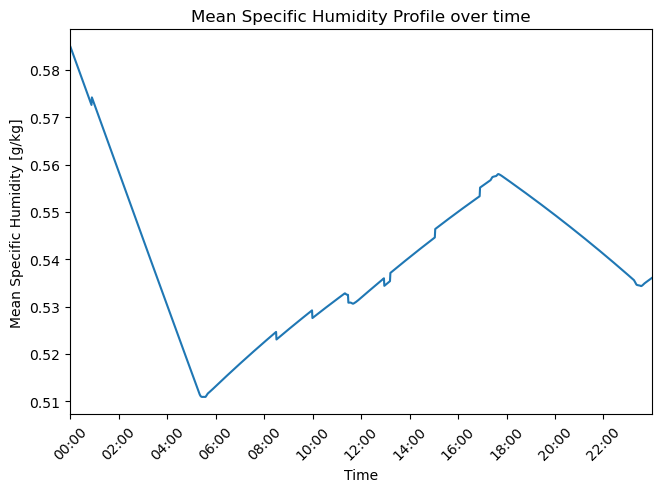

In [12]:
# Creating the plot using fig, ax
fig, ax = plt.subplots(figsize=(7.5, 5))

# Plotting the data
ax.plot(time, mean_specific_humidity)

# Formatting the plot
ax.set_xlabel('Time')
ax.set_ylabel('Mean Specific Humidity [g/kg]')
ax.set_title('Mean Specific Humidity Profile over time')

# Set x-ticks at regular intervals (e.g., every 3 hours)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Set x-axis limits from 00:00 to 23:59 on March 13th
start_time = datetime.datetime(2020, 3, 13, 0, 0)
end_time = datetime.datetime(2020, 3, 13, 23, 59)
ax.set_xlim(start_time, end_time)

# Rotate the x-tick labels for better readability
plt.xticks(rotation=45);
fig.savefig("./figures/mean-specific-humidity.png", dpi=500, bbox_inches="tight")

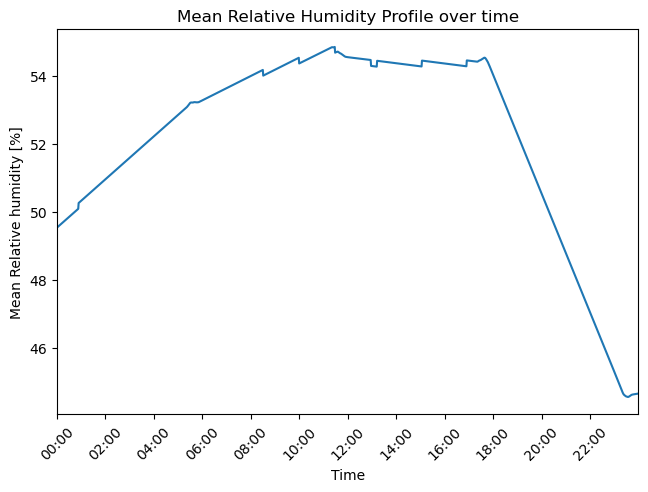

In [13]:
# Creating the plot using fig, ax
fig, ax = plt.subplots(figsize=(7.5, 5))

# Plotting the data
ax.plot(time, mean_relative_humidity)

# Formatting the plot
ax.set_xlabel('Time')
ax.set_ylabel('Mean Relative humidity [%]')
ax.set_title('Mean Relative Humidity Profile over time')

# Set x-ticks at regular intervals (e.g., every 3 hours)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Set x-axis limits from 00:00 to 23:59 on March 13th
start_time = datetime.datetime(2020, 3, 13, 0, 0)
end_time = datetime.datetime(2020, 3, 13, 23, 59)
ax.set_xlim(start_time, end_time)

# Rotate the x-tick labels for better readability
plt.xticks(rotation=45);
fig.savefig("./figures/mean-relative-humidity.png", dpi=500, bbox_inches="tight")

# Plot for sensible and latent heat flux (use K m s^-1 instead of W m^-2)

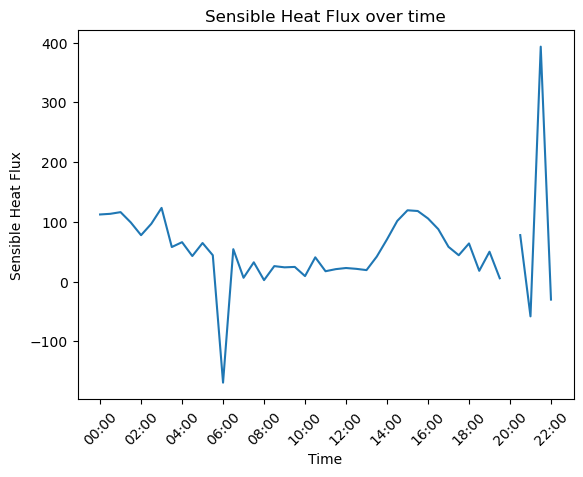

In [14]:
fig, ax = plt.subplots()
ax.plot(time_for_lat_sens_heat, sensible_heat_flux)
ax.set_xlabel("Time")
ax.set_ylabel("Sensible Heat Flux")
ax.set_title('Sensible Heat Flux over time')

# Set x-ticks at regular intervals (e.g., every 3 hours)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Set x-axis limits from 00:00 to 23:59 on March 13th
# start_time = datetime.datetime(2020, 3, 13, 0, 0)
# end_time = datetime.datetime(2020, 3, 13, 23, 59)
# ax.set_xlim(start_time, end_time)

# # Rotate the x-tick labels for better readability
plt.xticks(rotation=45);
fig.savefig("./figures/sensible-heat-flux.png", dpi=500, bbox_inches="tight")

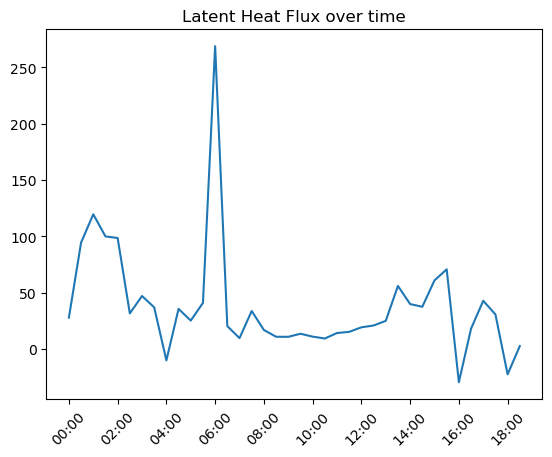

In [15]:
fig, ax = plt.subplots()
ax.plot(time_for_lat_sens_heat, latent_heat_flux)
ax.set_title('Latent Heat Flux over time')

# Set x-ticks at regular intervals (e.g., every 3 hours)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# # Rotate the x-tick labels for better readability
plt.xticks(rotation=45);
fig.savefig("./figures/latent-heat-flux.png", dpi=500, bbox_inches="tight")

For example, if you have a sensible heat flux of 100 W/m², you can convert it to K m/s⁻¹ as follows:

Sensible Heat Flux (K m/s⁻¹) = 100 W/m² / (1.225 kg/m³ * 1005 J/(kg·K)) ≈ 0.0816 K m/s⁻¹

So, 100 W/m² of sensible heat flux is approximately equal to 0.0816 K m/s⁻¹.

In [16]:
air_density = 1.225  
air_shc = 1005

def convert_shf_list(shf_list):
  """Convert a list of SHF values from W/m^2 to K*m/s"""
  # Empty list to store converted values  
  shf_kms_list = [] 
  # Iterate through list 
  for shf in shf_list:
    # Calculate and append conversion  
    shf_kms = shf / (air_density * air_shc)
    shf_kms_list.append(shf_kms)
  return shf_kms_list

In [17]:
# Convert list  
converted_list = convert_shf_list(sensible_heat_flux)
print(f"Converted SHF List (K*m/s): {converted_list}")

Converted SHF List (K*m/s): [0.09137983551629607, 0.0922733272413443, 0.09454766981419434, 0.08049548177479947, 0.063226723525231, 0.07870037567265713, 0.10031475276677836, 0.04711138186617931, 0.053706975327444416, 0.03486242258097269, 0.05257792669306529, 0.035942735303076456, -0.13727281957559143, 0.04420347243374962, 0.005309777642400244, 0.026341760584830946, 0.0021240735100010156, 0.021167631231597116, 0.019502487562189055, 0.020071073205401566, 0.007591430602091583, 0.033116052391105696, 0.014206518428266828, 0.017049446644329374, 0.01859275053304904, 0.017463701898669914, 0.015749822316986496, 0.03409889328865875, 0.057581480353335365, 0.08260737130673165, 0.09706569194842116, 0.096090973702914, 0.08593765864554777, 0.07146309269976647, 0.04737130673164788, 0.03596710325921414, 0.051984973093715095, 0.014766981419433445, 0.040751345314245103, 0.004653467357092091, nan, 0.06333231800182759, -0.04714387247436288, 0.31954513148542996, -0.024351710833587167, nan, nan, nan]


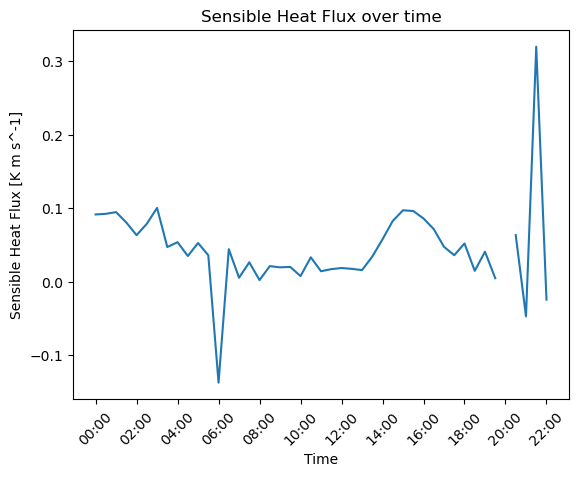

In [21]:
fig, ax = plt.subplots()
ax.plot(time_for_lat_sens_heat, converted_list)
ax.set_xlabel("Time")
ax.set_ylabel("Sensible Heat Flux [K m s^-1]")
ax.set_title('Sensible Heat Flux over time')

# Set x-ticks at regular intervals (e.g., every 3 hours)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# # Rotate the x-tick labels for better readability
plt.xticks(rotation=45);
# fig.savefig("./figures/latent-heat-flux.png", dpi=500, bbox_inches="tight")

Converting latent heat flux from watts per square meter (W/m²) to grams per kilogram per meter per second (g/kg·m/s) involves a few steps. Latent heat flux represents the energy transfer associated with the phase change of water, typically from liquid to vapor or vice versa. To convert it to a mass flux in grams per kilogram per meter per second, you need to consider the latent heat of vaporization and the density of water vapor.

Here's the conversion:

1. Determine the latent heat of vaporization (L) of water:
   The latent heat of vaporization of water at standard atmospheric conditions is approximately 2.5 x 10^6 J/kg.

2. Calculate the mass flux (Q) in kg/m²·s:
   Q = Latent heat flux (W/m²) / L (J/kg)

3. Convert the mass flux (Q) to grams per kilogram per meter per second:
   Q (g/kg·m/s) = Q (kg/m²·s) * 1000 (g/kg)

So, to convert latent heat flux from W/m² to g/kg·m/s, you can use the formula:

Q (g/kg·m/s) = (Latent heat flux in W/m²) / (2.5 x 10^6 J/kg)

Plug in the value of the latent heat flux you want to convert to get the result in g/kg·m/s.

In [ ]:
# Latent heat of vaporization of water
L = 2.5e6 # J/kg  

def convert_lhf(lhf):
  """Convert latent heat flux from W/m2 to g/kg*m/s"""
  
  # Calculate mass flux 
  q_kgs = lhf / L # kg/m2*s 
  
  # Convert mass flux to g/kg*m/s
  q_gkgms = q_kgs * 1000 # g/kg*m/s  

  return q_gkgms

# Example 
lhf_watts = 100 # W/m2
lhf_gkgms = convert_lhf(lhf_watts)  

print(f"{lhf_watts} W/m2 latent heat flux converts to {lhf_gkgms:.3f} g/kg*m/s")